# Portofolio:

# Business Understanding

## Introduction

The Team marketing has conducted a marketing strategy using discount 99% for first month after sign up in fitness center to attract new customers. This customer acquisition strategy used the top five popular social media platform. Our main goal for this analysis is to know how much the cost per acquisition using funnel analysis. Few things we need to know:
- The CPM: IDR65.000
- Impression: 990.000

## Objectives

There are metrics and KPI we need to calculate, like:
- Impression per click
- Total user reach
- Impression per user
- User per click
- Click per message
- Message per visit
- Visit per closing
- cost per acquisition

## Tools and Dataset Needed

The tools need for this analysis is Python Interpreter, Python library(numpy, pandas, matplotlib, seaborn), JupyterLab. We use the fitness acquisition csv dataset for this analysis. This dataset has four variables and those are id, platform, date, and action during the date.

## Methodology

We will use AIDA concept for this analysis with some modification to fit the problem. It's AIDCA (Awareness, Interest, Desire, Conviction, and Action). In this dataset, the action variables follow this term:
- Awareness = Impression
- Interest = Click
- Desire = Message(DM)
- Conviction = Visit
- Action = Closing

```
impression per click = total impression / total click

impression per user = total impression / total user

user per click = total user / total click

click per message = total click / total direct message

message per visit = total direct message / total visit store

visit per close = total users visit store / total close
where close means purchase or subscribe

cost per acquisition = (cost per mile / 1000) * impression / total close
```

# Data Understanding

## Data Acquisition

In [1]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data/fitness_acquisition.csv')

In [3]:
print(dataset.head())

        id   platform        date      action
0  1000001  instagram  2024-01-03  impression
1  1000004   facebook  2024-01-01  impression
2  1000006   linkedin  2024-01-04  impression
3  1000007  instagram  2024-01-04  impression
4  1000008   facebook  2024-01-01  impression


## Data Profiling

In [4]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059786 entries, 0 to 1059785
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   id        1059786 non-null  int64 
 1   platform  1059786 non-null  object
 2   date      1059786 non-null  object
 3   action    1059786 non-null  object
dtypes: int64(1), object(3)
memory usage: 32.3+ MB


In [5]:
# missing values
dataset.isna().sum()

id          0
platform    0
date        0
action      0
dtype: int64

In [6]:
# duplicated values
dataset.duplicated().sum()

np.int64(679203)

This problem maybe happens because some records happen twice or more.

In [7]:
# correct wrong format
dataset['date'] = pd.to_datetime(dataset['date'])

In [8]:
dataset['id'] = dataset['id'].astype(int).astype(str)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059786 entries, 0 to 1059785
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   id        1059786 non-null  object        
 1   platform  1059786 non-null  object        
 2   date      1059786 non-null  datetime64[ns]
 3   action    1059786 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.3+ MB


## Descriptive Statistics

In [28]:
dataset.describe(include='all')

,id,platform,date,action
count,1059786,1059786,1059786,1059786
unique,90000,5,NaN,5
top,1075685,facebook,NaN,impression
freq,38,381834,NaN,990000
mean,NaN,NaN,2024-01-02 12:52:52.661649408,NaN
min,NaN,NaN,2024-01-01 00:00:00,NaN
25%,NaN,NaN,2024-01-02 00:00:00,NaN
50%,NaN,NaN,2024-01-03 00:00:00,NaN
75%,NaN,NaN,2024-01-04 00:00:00,NaN
max,NaN,NaN,2024-01-12 00:00:00,NaN


In [10]:
dataset['id'].value_counts()

id
1075685    38
1023730    37
1099075    37
1057861    37
1040609    36
           ..
1023677     1
1023674     1
1000077     1
1048965     1
1099943     1
Name: count, Length: 90000, dtype: int64

In [11]:
dataset['platform'].value_counts()

platform
facebook     381834
instagram    255000
linkedin     185359
tiktok       172411
youtube       65182
Name: count, dtype: int64

In [12]:
dataset['date'].value_counts().sort_index()

date
2024-01-01    260299
2024-01-02    263376
2024-01-03    264100
2024-01-04    264436
2024-01-05      3131
2024-01-06       641
2024-01-07      1066
2024-01-08      1099
2024-01-09       988
2024-01-10       520
2024-01-11       121
2024-01-12         9
Name: count, dtype: int64

We can see that the platform advertises on the first four days.

In [13]:
dataset['action'].value_counts()

action
impression    990000
click          40950
message        22860
visit           4500
close           1476
Name: count, dtype: int64

# Data Preprocessing

In [14]:
def ratio(x,y):
    """
    x per y
    """
    result = x/y 
    return result

In [132]:
def pie(a, b, a_label, b_label, caption):
    plt.pie(
        x=[(a-b), 
           b], 
        autopct='%1.1f%%', 
        labels=[a_label,
                b_label])
    plt.text(x=1, y=-1, s=f"{caption}: {int(a)}")
    plt.text(x=1, y=-1.1, s=f"{a_label}: {int(a-b)}")
    plt.text(x=1, y=-1.2, s=f"{b_label}: {int(b)}")

    plt.show()

In [113]:
pivot_table = dataset.pivot_table(
    columns='action',
    index='id', 
    values='date', 
    aggfunc='count')[['impression',
                    'click',
                    'message',
                    'visit',
                    'close']]

In [66]:
pivot_table.head()

action,impression,click,message,visit,close
id,,,,,
1000001,5.0,1.0,NaN,NaN,NaN
1000004,24.0,1.0,1.0,NaN,NaN
1000006,6.0,NaN,NaN,NaN,NaN
1000007,19.0,NaN,NaN,NaN,NaN
1000008,12.0,1.0,1.0,1.0,1.0


In [94]:
impression = pivot_table['impression'].sum()
user = len(pivot_table.index)
click = pivot_table['click'].sum()
message = pivot_table['message'].sum()
visit = pivot_table['visit'].sum()
close = pivot_table['close'].sum()

# Modeling

In [68]:
print(f"Users see the ads about {ratio(total_impression, total_user)} times to click the ads (if interested).")

Users see the ads about 11.0 times to click the ads (if interested).


In [133]:
pie(user, click, x_label='not click', y_label='click', caption='Total user')

TypeError: pie() got an unexpected keyword argument 'x_label'

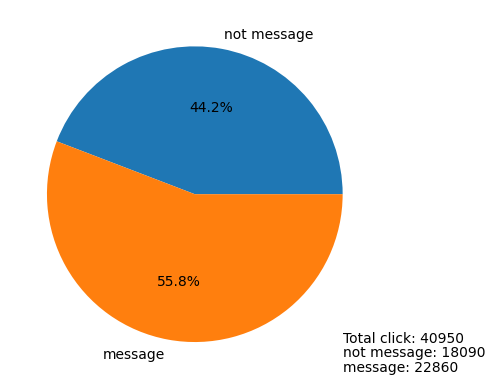

In [134]:
pie(click, message, a_label='not message', b_label='message', caption='Total click')

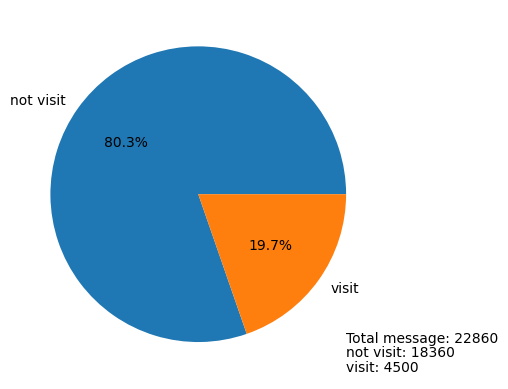

In [135]:
pie(message, visit, 'not visit', 'visit', 'Total message')

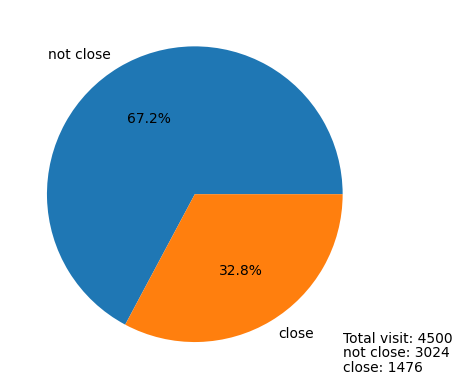

In [136]:
pie(visit, close, 'not close', 'close', 'Total visit')

# Insights

## Interpretation and Reporting

## Action

## Further Analysis